# Examining the performance of sorting algorithms

In [1]:
import matplotlib.pyplot as plt
import randArrGen, time
import bubbleSort, heapSort, quickSort, mergeSort, countingSort, radixSort, insertionSort, bucketSort

## How the examination is being done?

- In order to see how is sorting algorithms performance, I test each algorithm for lists of sizes 1000, 2000, ... up to 15000. however, there may be some error and noise during the process of sorting, so I made 3 lists of each size and then calculated the average of the sorting times.

- **Note: The time it takes for each sorting algorithm to finish, highly depends on the system resources; So based on your resources, your numbers and timings might differ from what I have obtained. I should mention that I have tested and ran all these algorithms in a system with 8GBs of RAM and Intel Core i7 gen 7 CPU.**

In [23]:
lists = {} # Dictionary of lists with their length as key, and 3 lists of that length as value

for i in range(1,16):
    lists[i*10**3] = [randArrGen.random_list(i * 10**3, 0, i * 10**3) for j in range(3)]

## Basic sorting ideas: sorting in O(n^2)

- First we see how bubble sort and insertion sort perform. These are some of the most basic sorting ideas which sort the given array in O(n^2)

- However, I should mention that for a modified version of bubble sort, the best case scenario is O(n) which is basically a sorted array.

In [3]:
bubble_sort_times = []
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        bubbleSort.bubble_sort(temp, i)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    bubble_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 1000: 0.09112135569254558
Time of sorting array of length 2000: 0.2304688294728597
Time of sorting array of length 3000: 0.4340243339538574
Time of sorting array of length 4000: 0.7604215145111084
Time of sorting array of length 5000: 1.3505273660024006
Time of sorting array of length 6000: 1.7165841261545818
Time of sorting array of length 7000: 2.37127947807312
Time of sorting array of length 8000: 3.1394333044687905
Time of sorting array of length 9000: 3.894075870513916
Time of sorting array of length 10000: 4.791569153467814
Time of sorting array of length 11000: 5.839078028996785
Time of sorting array of length 12000: 7.278539260228475
Time of sorting array of length 13000: 8.76994506518046
Time of sorting array of length 14000: 9.986210743586222
Time of sorting array of length 15000: 11.569778442382812


In [5]:
insertion_sort_times = []
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        insertionSort.insertion_sort(temp, i)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    insertion_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 1000: 0.1246332327524821
Time of sorting array of length 2000: 0.21883098284403482
Time of sorting array of length 3000: 0.45932801564534503
Time of sorting array of length 4000: 0.7157437006632487
Time of sorting array of length 5000: 1.1219213803609211
Time of sorting array of length 6000: 1.5932803948720295
Time of sorting array of length 7000: 2.33077605565389
Time of sorting array of length 8000: 2.9141313234965005
Time of sorting array of length 9000: 3.7201741536458335
Time of sorting array of length 10000: 4.585692962010701
Time of sorting array of length 11000: 5.337906042734782
Time of sorting array of length 12000: 6.583709319432576
Time of sorting array of length 13000: 8.088592767715454
Time of sorting array of length 14000: 9.403437534968058
Time of sorting array of length 15000: 10.607149759928385


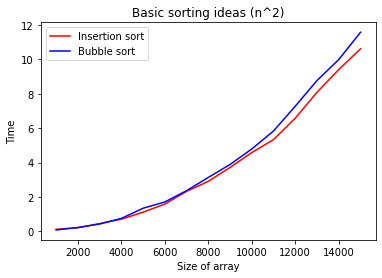

In [6]:
plt.plot(lists.keys(), insertion_sort_times, 'r')
plt.plot(lists.keys(), bubble_sort_times, 'b')
plt.legend(["Insertion sort", "Bubble sort"])
plt.xlabel("Size of array")
plt.ylabel("Time")
plt.title("Basic sorting ideas (n^2)")
plt.show()

- As it can be seen above, these two sorting algorithms have pretty much a quadratic form, as we expected.

- We now move on to some better algorithms of O(n*log(n))

## Better sortings (O(n*log(n)))

- Before going any further, there is a problem that has to be dealt with: These algorithms are substantially faster than pervious ones, which causes a lot of noise and error in the timing, as it can be seen in the plot below.

In [24]:
merge_sort_times = []
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        mergeSort.mergeSort(temp, 0, i-1)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    merge_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 1000: 0.013531923294067383
Time of sorting array of length 2000: 0.016276439030965168
Time of sorting array of length 3000: 0.04842185974121094
Time of sorting array of length 4000: 0.051923672358194985
Time of sorting array of length 5000: 0.05372262001037598
Time of sorting array of length 6000: 0.03318969408671061
Time of sorting array of length 7000: 0.041094303131103516
Time of sorting array of length 8000: 0.05040407180786133
Time of sorting array of length 9000: 0.05167833964029948
Time of sorting array of length 10000: 0.06572119394938152
Time of sorting array of length 11000: 0.06887880961100261
Time of sorting array of length 12000: 0.07467238108317058
Time of sorting array of length 13000: 0.07237044970194499
Time of sorting array of length 14000: 0.08916592597961426
Time of sorting array of length 15000: 0.09595791498819987


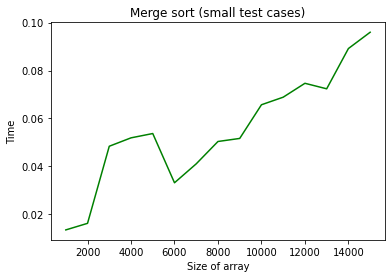

In [25]:
plt.plot(lists.keys(), merge_sort_times, 'g')
plt.xlabel("Size of array")
plt.ylabel("Time")
plt.title("Merge sort (small test cases)")
plt.show()

- When we use small test cases, the time it takes for these fast algorithms to perform the main task becomes insignificant and the timing would be highly effected by other factors like CPU overheads, other processes of OS, and lots of other factors (which I like to call them Noise).

- In order to solve this problem, I have increased the size of arrays by a factor of 10. Basically adding another zero :) 

In [13]:
lists = {} # Dictionary of lists with their length as key, and 3 lists of that length as value

for i in range(1,16):
    lists[i*10**4] = [randArrGen.random_list(i * 10**4, 0, i * 10**4) for j in range(3)]

In [10]:
merge_sort_times = []
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        mergeSort.mergeSort(temp, 0, i-1)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    merge_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 10000: 0.10261225700378418
Time of sorting array of length 20000: 0.14940388997395834
Time of sorting array of length 30000: 0.20868643124898276
Time of sorting array of length 40000: 0.26280927658081055
Time of sorting array of length 50000: 0.3859533468882243
Time of sorting array of length 60000: 0.4251643816630046
Time of sorting array of length 70000: 0.49413394927978516
Time of sorting array of length 80000: 0.598909060160319
Time of sorting array of length 90000: 0.644964853922526
Time of sorting array of length 100000: 0.7233325640360514
Time of sorting array of length 110000: 0.839012622833252
Time of sorting array of length 120000: 0.9081676006317139
Time of sorting array of length 130000: 0.9780561923980713
Time of sorting array of length 140000: 1.024504820505778
Time of sorting array of length 150000: 1.1089136600494385


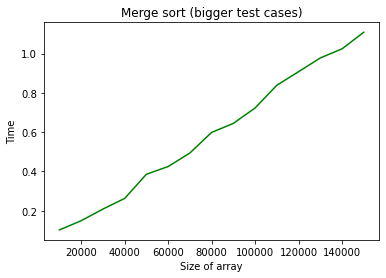

In [11]:
plt.plot(lists.keys(), merge_sort_times, 'g')
plt.xlabel("Size of array")
plt.ylabel("Time")
plt.title("Merge sort (bigger test cases)")
plt.show()

- As it can be seen in the plot above, the line is much more smoother and we have reduced the noise by increasing the size of test cases.

- Now we examine our better sorting algorithms.

In [14]:
heap_sort_times = []
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        heapSort.heap_sort(temp, i)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    heap_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 10000: 0.19340944290161133
Time of sorting array of length 20000: 0.20038771629333496
Time of sorting array of length 30000: 0.3274623552958171
Time of sorting array of length 40000: 0.46628721555074054
Time of sorting array of length 50000: 0.6278866132100424
Time of sorting array of length 60000: 0.694132407506307
Time of sorting array of length 70000: 0.8282483418782552
Time of sorting array of length 80000: 0.9896380106608073
Time of sorting array of length 90000: 1.1000486214955647
Time of sorting array of length 100000: 1.3071043491363525
Time of sorting array of length 110000: 1.438718557357788
Time of sorting array of length 120000: 1.5315149625142415
Time of sorting array of length 130000: 1.6495052973429363
Time of sorting array of length 140000: 1.781274716059367
Time of sorting array of length 150000: 1.9554677804311116


In [15]:
quick_sort_times = []
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        quickSort.quick_sort(temp, 0, i-1)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    quick_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 10000: 0.05261667569478353
Time of sorting array of length 20000: 0.13280566533406576
Time of sorting array of length 30000: 0.1155542532602946
Time of sorting array of length 40000: 0.14812795321146646
Time of sorting array of length 50000: 0.19546635945638022
Time of sorting array of length 60000: 0.2130591074625651
Time of sorting array of length 70000: 0.24125075340270996
Time of sorting array of length 80000: 0.2797404130299886
Time of sorting array of length 90000: 0.31762123107910156
Time of sorting array of length 100000: 0.3523714542388916
Time of sorting array of length 110000: 0.4019633928934733
Time of sorting array of length 120000: 0.4410278797149658
Time of sorting array of length 130000: 0.4926724433898926
Time of sorting array of length 140000: 0.5332125822703043
Time of sorting array of length 150000: 0.5801476637522379


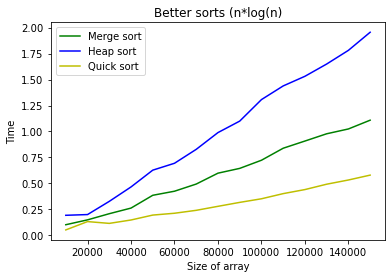

In [16]:
plt.plot(lists.keys(), merge_sort_times, 'g')
plt.plot(lists.keys(), heap_sort_times, 'b')
plt.plot(lists.keys(), quick_sort_times, 'y')
plt.legend(["Merge sort", "Heap sort", "Quick sort"])
plt.xlabel("Size of array")
plt.ylabel("Time")
plt.title("Better sorts (n*log(n)")
plt.show()

## Sorting in linear time

- Again, because of high performance of linear sorts, we have to increase the size of our test cases to avoid noises. 

In [26]:
lists = {} # Dictionary of lists with their length as key, and 3 lists of that length as value

for i in range(1,16):
    lists[i*10**5] = [randArrGen.random_list(i * 10**5, 0, i * 10**5) for j in range(3)]

In [27]:
counting_sort_times = []
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        m = max(temp)
        countingSort.counting_sort(temp, m, i)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    counting_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 100000: 0.16066360473632812
Time of sorting array of length 200000: 0.27098949750264484
Time of sorting array of length 300000: 0.4018394947052002
Time of sorting array of length 400000: 0.4505913257598877
Time of sorting array of length 500000: 0.5695966879526774
Time of sorting array of length 600000: 0.7174333731333414
Time of sorting array of length 700000: 0.8483819166819254
Time of sorting array of length 800000: 0.9591618378957113
Time of sorting array of length 900000: 1.0823726654052734
Time of sorting array of length 1000000: 1.231252670288086
Time of sorting array of length 1100000: 1.3519888718922932
Time of sorting array of length 1200000: 1.5316688219706218
Time of sorting array of length 1300000: 1.6061152617136638
Time of sorting array of length 1400000: 1.7466917832692463
Time of sorting array of length 1500000: 1.8920007546742756


In [29]:
radix_sort_times = []
from importlib import reload
reload(radixSort)
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        radixSort.radix_sort(temp)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    radix_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 100000: 0.5871687730153402
Time of sorting array of length 200000: 1.162885268529256
Time of sorting array of length 300000: 1.6257357597351074
Time of sorting array of length 400000: 2.2206336657206216
Time of sorting array of length 500000: 2.8269399801890054
Time of sorting array of length 600000: 3.3146345615386963
Time of sorting array of length 700000: 3.852781136830648
Time of sorting array of length 800000: 4.471224784851074
Time of sorting array of length 900000: 4.922407070795695
Time of sorting array of length 1000000: 6.227357625961304
Time of sorting array of length 1100000: 7.180795192718506
Time of sorting array of length 1200000: 7.770192861557007
Time of sorting array of length 1300000: 8.377074082692465
Time of sorting array of length 1400000: 9.132152557373047
Time of sorting array of length 1500000: 9.61143692334493


In [31]:
bucket_sort_times = []
from importlib import reload
reload(radixSort)
for i in lists.keys():
    length_lists = lists[i]
    temp_times = []
    
    for j in length_lists:
        temp = j.copy()
        
        start = time.time()
        temp = bucketSort.bucket_sort(temp, i)
        end = time.time()
        
        temp_times.append(end-start)
        
    avr_time = sum(temp_times)/3
    bucket_sort_times.append(avr_time) 
    print(f"Time of sorting array of length {i}: {avr_time}")

Time of sorting array of length 100000: 0.6105388800303141
Time of sorting array of length 200000: 1.4096158345540364
Time of sorting array of length 300000: 1.774167537689209
Time of sorting array of length 400000: 2.599822521209717
Time of sorting array of length 500000: 2.7968860467274985
Time of sorting array of length 600000: 3.4217652479807534
Time of sorting array of length 700000: 3.686129649480184
Time of sorting array of length 800000: 4.155517578125
Time of sorting array of length 900000: 4.283142646153768
Time of sorting array of length 1000000: 4.778863747914632
Time of sorting array of length 1100000: 5.270521640777588
Time of sorting array of length 1200000: 5.595555861790975
Time of sorting array of length 1300000: 5.746547222137451
Time of sorting array of length 1400000: 6.049718936284383
Time of sorting array of length 1500000: 6.814434448877971


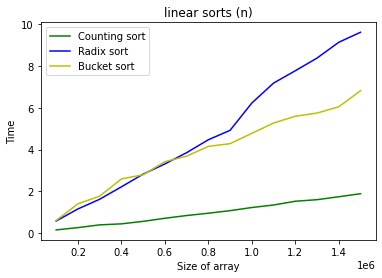

In [32]:
plt.plot(lists.keys(), counting_sort_times, 'g')
plt.plot(lists.keys(), radix_sort_times, 'b')
plt.plot(lists.keys(), bucket_sort_times, 'y')
plt.legend(["Counting sort", "Radix sort", "Bucket sort"])
plt.xlabel("Size of array")
plt.ylabel("Time")
plt.title("linear sorts (n)")
plt.show()